In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes' ]]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
independent=sc.fit_transform(independent)

In [12]:
from sklearn.model_selection  import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],'max_features':['sqrt','log2',None]}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(independent,dependent)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=3)

In [13]:
re=grid.cv_results_

print("The R_score value for best parameters {}: ".format(grid.best_params_))

The R_score value for best parameters {'criterion': 'poisson', 'max_features': None, 'splitter': 'best'}: 


In [14]:
table=pd.DataFrame.from_dict(re)

In [15]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011060,0.000969,0.001922,0.001588,squared_error,sqrt,best,"{'criterion': 'squared_error', 'max_features':...",0.678570,0.633950,0.619017,0.688918,0.710394,0.666170,0.034318,17
1,0.007534,0.001676,0.001927,0.000754,squared_error,sqrt,random,"{'criterion': 'squared_error', 'max_features':...",0.723686,0.644032,0.709855,0.655325,0.627827,0.672145,0.037725,15
2,0.006926,0.002853,0.003945,0.003123,squared_error,log2,best,"{'criterion': 'squared_error', 'max_features':...",0.655073,0.582204,0.720003,0.605933,0.747205,0.662083,0.063534,18
3,0.006189,0.003635,0.004103,0.002373,squared_error,log2,random,"{'criterion': 'squared_error', 'max_features':...",0.654916,0.583910,0.755842,0.643837,0.642737,0.656248,0.055660,20
4,0.010562,0.000982,0.003238,0.000791,squared_error,None,best,"{'criterion': 'squared_error', 'max_features':...",0.735035,0.647373,0.730785,0.728906,0.689098,0.706240,0.033777,7
5,0.007146,0.000585,0.001466,0.001021,squared_error,None,random,"{'criterion': 'squared_error', 'max_features':...",0.740555,0.617180,0.670349,0.705836,0.718449,0.690474,0.043136,11
6,0.006438,0.000960,0.002754,0.001120,friedman_mse,sqrt,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.687846,0.654291,0.767174,0.778034,0.691907,0.715850,0.048266,2
7,0.005276,0.001568,0.002758,0.001730,friedman_mse,sqrt,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.733058,0.648341,0.700667,0.609403,0.670881,0.672470,0.042493,14
8,0.007116,0.000961,0.002792,0.001515,friedman_mse,log2,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.751223,0.674889,0.758685,0.638466,0.723839,0.709420,0.046064,4
9,0.007163,0.003487,0.002975,0.001759,friedman_mse,log2,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.688660,0.534998,0.753373,0.458376,0.590223,0.605126,0.105481,23


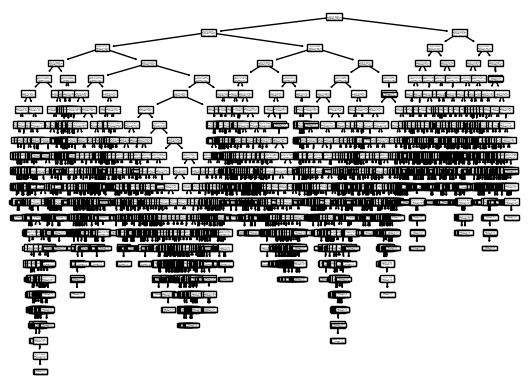

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
best_tree = grid.best_estimator_
tree.plot_tree(best_tree)
plt.show( )

In [17]:
y_pred=grid.predict(independent)

In [18]:
from sklearn.metrics import r2_score
r_score=r2_score(dependent,y_pred)

In [19]:
r_score

0.998667156135576

In [20]:
import pickle
filename="finalized_model_DecisionTree_grid.sav"
pickle.dump(grid,open(filename,'wb'))

In [21]:
loaded_model=pickle.load(open('finalized_model_DecisionTree_grid.sav','rb'))
result=loaded_model.predict([[25,26.5,0,1,0]])

In [22]:
result

array([14418.2804])